In [1]:
import numpy as np
import pandas as pd
df = pd.read_pickle("Data/news_embeddings_csl_sbert.pkl")
df.head()

,Date,Article_title,Stock_symbol,Url,close,1d_open,1d_close,3d_close,Unnamed: 0,arima_prediction,3d_change,3d_direction,arima_3d_direction,word2vec,bert,sBert,finBert
0,2020-06-10,Tech Stocks And FAANGS Strong Again To Start D...,AAPL,https://www.benzinga.com/government/20/06/1622...,352.839996,349.309998,335.899994,342.989990,59.0,1.373906,-1.809283,-1,1,"[0.22613467, 0.120725006, -0.0344015, -0.03363...","[-0.22223899, -0.21574433, 0.7697829, -0.25863...","[-0.005246668, -0.060425527, 0.07172174, 0.062...","[-0.26630303, -0.6620456, -0.7148093, -0.27177..."
1,2020-06-10,10 Biggest Price Target Changes For Wednesday,AAPL,https://www.benzinga.com/analyst-ratings/price...,352.839996,349.309998,335.899994,342.989990,59.0,1.373906,-1.809283,-1,1,"[0.7269928, 0.45623422, 0.16811378, 0.4158756,...","[-0.5261865, -0.26204786, 0.08753802, -0.09534...","[-0.0076999157, -0.036944382, 0.051584832, -0....","[0.17167464, -0.15455426, -0.38101625, 0.53613..."
2,2020-06-09,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",AAPL,https://www.benzinga.com/short-sellers/20/06/1...,343.989990,347.899994,352.839996,338.799988,58.0,-1.947308,-2.615696,-1,-1,"[0.16575599, 0.11278104, 0.14067568, 0.1441355...","[-0.51947445, -0.5419372, 0.20520952, 0.046122...","[-0.11140143, -0.052677345, -0.057600692, -0.0...","[-0.4587289, -0.883282, -0.9349482, 0.84453505..."
3,2020-06-09,"Deutsche Bank Maintains Buy on Apple, Raises P...",AAPL,https://www.benzinga.com/news/20/06/16219873/d...,343.989990,347.899994,352.839996,338.799988,58.0,-1.947308,-2.615696,-1,-1,"[0.77714425, 0.22397597, -0.2422117, 0.4820196...","[-0.663332, -0.025526464, 0.37389, 0.24639344,...","[0.03324856, -0.05314027, 0.014023768, 0.01497...","[-0.090272084, -0.32809806, -0.115412325, 0.36..."
4,2020-06-09,Apple To Let Users Trade In Their Mac Computer...,AAPL,https://www.benzinga.com/news/20/06/16218697/a...,343.989990,347.899994,352.839996,338.799988,58.0,-1.947308,-2.615696,-1,-1,"[0.21648331, 0.03065869, -0.09960988, 0.049770...","[-0.18243252, 0.09596918, -0.1363424, 0.259096...","[-0.023000775, 0.0014990732, 0.027343368, -0.0...","[0.28189945, -0.43821844, -1.1588358, 0.484726..."


In [2]:
df[["Date", "Article_title", "Stock_symbol", "close", "3d_direction", "arima_prediction", "arima_3d_direction", "word2vec", "bert", "sBert", "finBert"]].head()


,Date,Article_title,Stock_symbol,close,3d_direction,arima_prediction,arima_3d_direction,word2vec,bert,sBert,finBert
0,2020-06-10,Tech Stocks And FAANGS Strong Again To Start D...,AAPL,352.839996,-1,1.373906,1,"[0.22613467, 0.120725006, -0.0344015, -0.03363...","[-0.22223899, -0.21574433, 0.7697829, -0.25863...","[-0.005246668, -0.060425527, 0.07172174, 0.062...","[-0.26630303, -0.6620456, -0.7148093, -0.27177..."
1,2020-06-10,10 Biggest Price Target Changes For Wednesday,AAPL,352.839996,-1,1.373906,1,"[0.7269928, 0.45623422, 0.16811378, 0.4158756,...","[-0.5261865, -0.26204786, 0.08753802, -0.09534...","[-0.0076999157, -0.036944382, 0.051584832, -0....","[0.17167464, -0.15455426, -0.38101625, 0.53613..."
2,2020-06-09,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",AAPL,343.989990,-1,-1.947308,-1,"[0.16575599, 0.11278104, 0.14067568, 0.1441355...","[-0.51947445, -0.5419372, 0.20520952, 0.046122...","[-0.11140143, -0.052677345, -0.057600692, -0.0...","[-0.4587289, -0.883282, -0.9349482, 0.84453505..."
3,2020-06-09,"Deutsche Bank Maintains Buy on Apple, Raises P...",AAPL,343.989990,-1,-1.947308,-1,"[0.77714425, 0.22397597, -0.2422117, 0.4820196...","[-0.663332, -0.025526464, 0.37389, 0.24639344,...","[0.03324856, -0.05314027, 0.014023768, 0.01497...","[-0.090272084, -0.32809806, -0.115412325, 0.36..."
4,2020-06-09,Apple To Let Users Trade In Their Mac Computer...,AAPL,343.989990,-1,-1.947308,-1,"[0.21648331, 0.03065869, -0.09960988, 0.049770...","[-0.18243252, 0.09596918, -0.1363424, 0.259096...","[-0.023000775, 0.0014990732, 0.027343368, -0.0...","[0.28189945, -0.43821844, -1.1588358, 0.484726..."


In [3]:
df["Stock_symbol"].unique()

array(['AAPL', 'ADBE', 'AMD', 'AMZN', 'BBK', 'GOOGL', 'GRMN', 'HPQ',
       'IBM', 'INTC', 'NFLX', 'NVDA', 'ORCL', 'TSLA'], dtype=object)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

def visualize_performance(y_test, **model_predictions):
    # some gpt help used to visualize
    metrics = { 
        "Model": [], "Accuracy": [], "F1 Score": [], "Precision": [], "Recall": [], "ROC AUC": []
    }
    
    fig, axes = plt.subplots(1, len(model_predictions), figsize=(4 * len(model_predictions), 4))
    if len(model_predictions) == 1:
        axes = [axes]
    
    # Loop through each model's predictions
    for i, (model_name, y_pred) in enumerate(model_predictions.items()):
        metrics["Model"].append(model_name)
        metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
        metrics["F1 Score"].append(f1_score(y_test, y_pred, average='weighted'))
        metrics["Precision"].append(precision_score(y_test, y_pred, average='weighted'))
        metrics["Recall"].append(recall_score(y_test, y_pred, average='weighted'))
        metrics["ROC AUC"].append(roc_auc_score(y_test, y_pred, multi_class='ovr'))
        
        # Plot Confusion Matrix
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens', ax=axes[i])
        axes[i].set_title(f'{model_name} Confusion Matrix')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')

    # Convert to DataFrame
    metrics_df = pd.DataFrame(metrics)
    print(metrics_df)

    # Bar plot for model performance
    plt.figure(figsize=(6, 4))
    metrics_melted = metrics_df.melt(id_vars=['Model'], var_name='Metric', value_name='Score')
    sns.barplot(data=metrics_melted, x='Model', y='Score', hue='Metric', palette='Greens')
    plt.title('Model Performance Metrics')
    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.axhline(0.5, color='red', linestyle='--', label='Baseline (0.5)')
    plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np
from lightgbm import LGBMClassifier

def extract_embeddings(df_balanced):
    X_bert = np.stack(df_balanced['bert'].values)
    X_finBert = np.stack(df_balanced['finBert'].values)
    X_sBert = np.stack(df_balanced['sBert'].values)
    X_word2vec = np.stack(df_balanced['word2vec'].values)
    y = df_balanced['3d_direction'].values
    return X_bert, X_finBert, X_sBert, X_word2vec, y

def get_predictions():
    # Define models
    clf_sBert, clf_bert, clf_finBert, clf_word2vec = [LGBMClassifier(random_state=42, learning_rate=0.1, 
                                                       n_estimators=200, num_leaves=50, verbose = -1) for i in range(4)]

    # Train models on respective embeddings
    clf_sBert.fit(X_train_sBert, y_train)
    clf_bert.fit(X_train_bert, y_train)
    clf_finBert.fit(X_train_finBert, y_train)
    clf_word2vec.fit(X_train_word2vec, y_train)

    # Make predictions
    y_pred_sBert = clf_sBert.predict(X_test_sBert)
    y_pred_bert = clf_bert.predict(X_test_bert)
    y_pred_finBert = clf_finBert.predict(X_test_finBert)
    y_pred_word2vec = clf_word2vec.predict(X_test_word2vec)
    
    return y_pred_sBert, y_pred_bert, y_pred_finBert, y_pred_word2vec

### Random split, not time wise split (lightgbm)

      Model  Accuracy  F1 Score  Precision    Recall   ROC AUC
0  Word2Vec  0.514499  0.510448   0.510439  0.514499  0.507973
1      BERT  0.551570  0.547162   0.548175  0.551570  0.544725
2   FinBERT  0.551570  0.546631   0.547984  0.551570  0.544359
3     SBERT  0.554260  0.551177   0.551490  0.554260  0.548427
4     ARIMA  0.603587  0.602448   0.602347  0.603587  0.599756


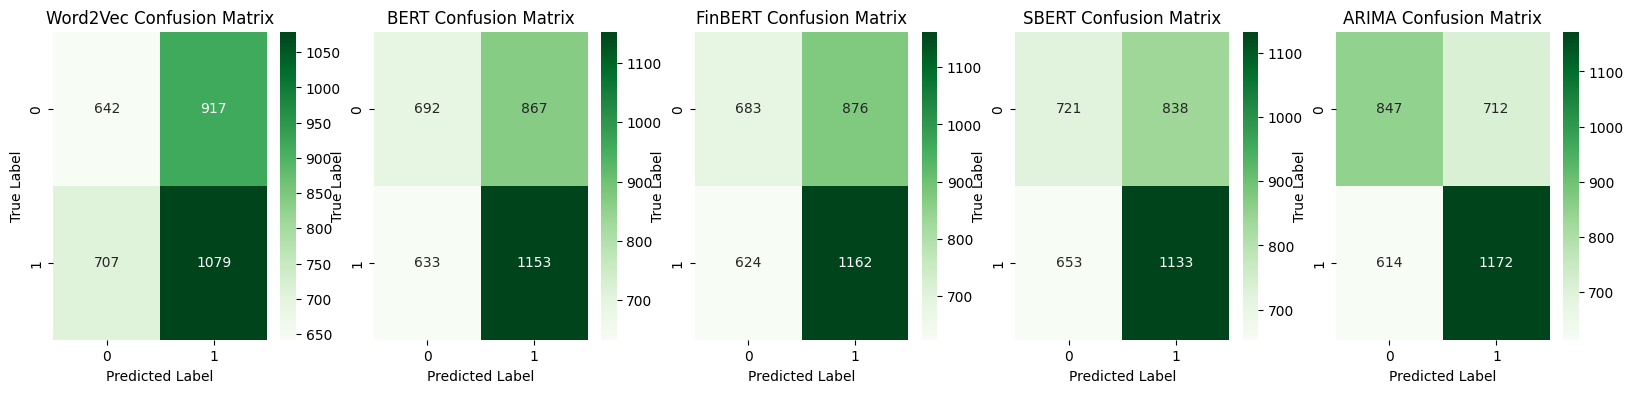

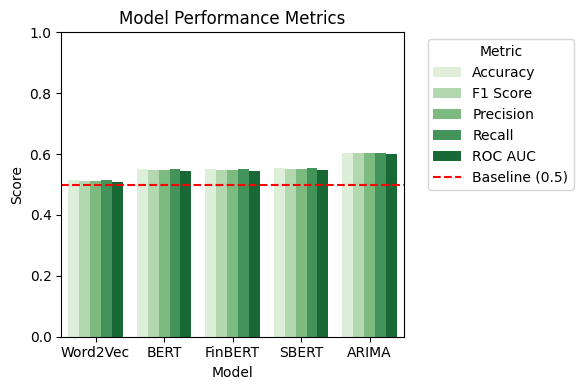

In [20]:
df_balanced = df.copy().reset_index(drop=True)
    
# extract vectors
X_bert, X_finBert, X_sBert, X_word2vec, y = extract_embeddings(df_balanced)

X_train_bert, X_test_bert, y_train, y_test, train_idx, test_idx = train_test_split(X_bert, y, np.arange(len(y)), test_size=0.2, random_state=42, stratify=y)
X_train_finBert, X_test_finBert, _, _, _, _ = train_test_split(X_finBert, y, np.arange(len(y)), test_size=0.2, random_state=42, stratify=y)
X_train_sBert, X_test_sBert, _, _, _, _ = train_test_split(X_sBert, y, np.arange(len(y)), test_size=0.2, random_state=42, stratify=y)
X_train_word2vec, X_test_word2vec, _, _, _, _ = train_test_split(X_word2vec, y, np.arange(len(y)), test_size=0.2, random_state=42, stratify=y)
X_test_index = test_idx

y_pred_sBert, y_pred_bert, y_pred_finBert, y_pred_word2vec = get_predictions()

# Visualize performance
visualize_performance(y_test, Word2Vec = y_pred_word2vec, BERT=y_pred_bert, FinBERT=y_pred_finBert, SBERT=y_pred_sBert,
                      ARIMA=df_balanced.loc[X_test_index, "arima_3d_direction"])

### Timewise 8-2, no arima

Processing NFLX
      Model  Accuracy  F1 Score  Precision    Recall   ROC AUC
0  Word2Vec  0.561247  0.559853   0.558726  0.561247  0.543581
1      BERT  0.516704  0.509284   0.505442  0.516704  0.489233
2   FinBERT  0.527840  0.522857   0.519895  0.527840  0.503651
3     SBERT  0.538976  0.533195   0.530159  0.538976  0.513915
4     ARIMA  0.505568  0.508173   0.512030  0.505568  0.495580


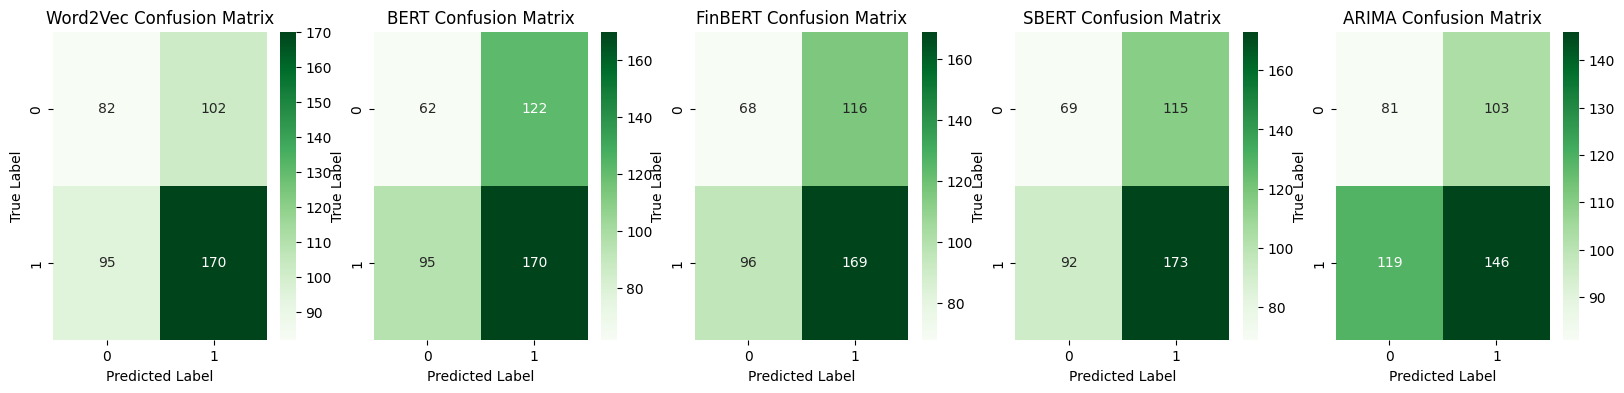

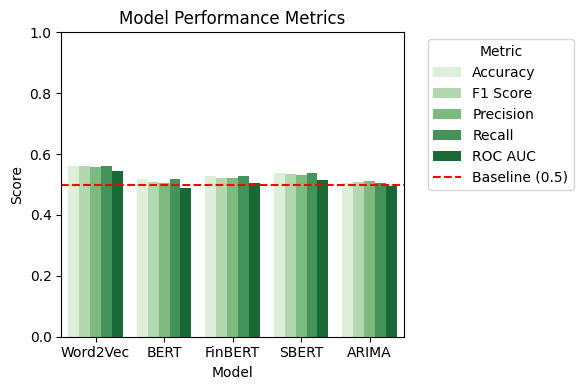

Processing NVDA
      Model  Accuracy  F1 Score  Precision    Recall   ROC AUC
0  Word2Vec  0.494970  0.492471   0.505165  0.494970  0.501704
1      BERT  0.537223  0.532628   0.552606  0.537223  0.546419
2   FinBERT  0.505030  0.500115   0.518248  0.505030  0.514006
3     SBERT  0.501006  0.498700   0.511263  0.501006  0.507614
4     ARIMA  0.509054  0.509581   0.510371  0.509054  0.507027


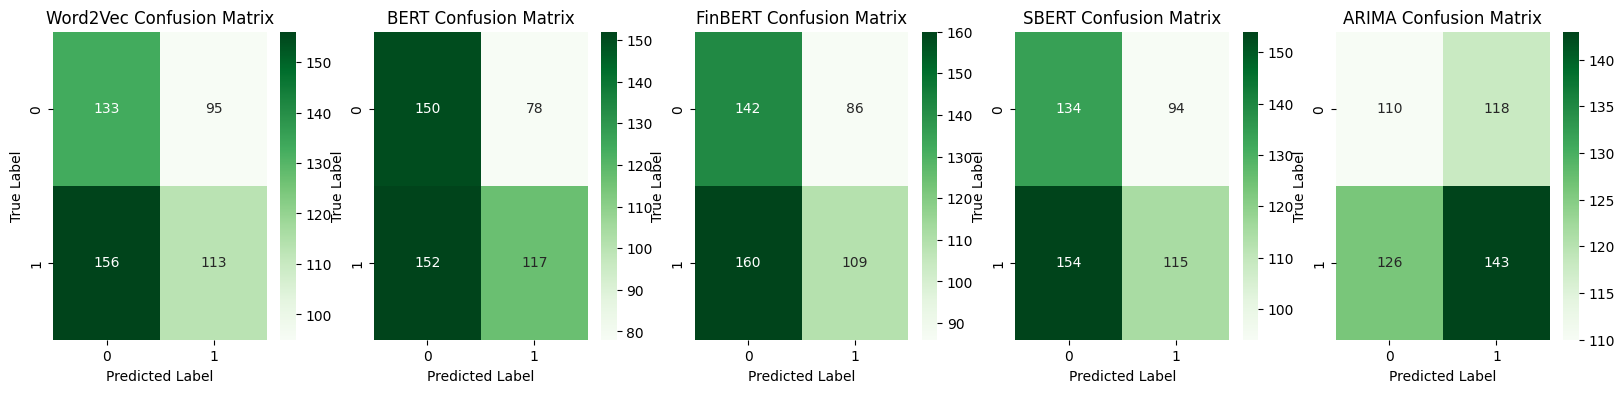

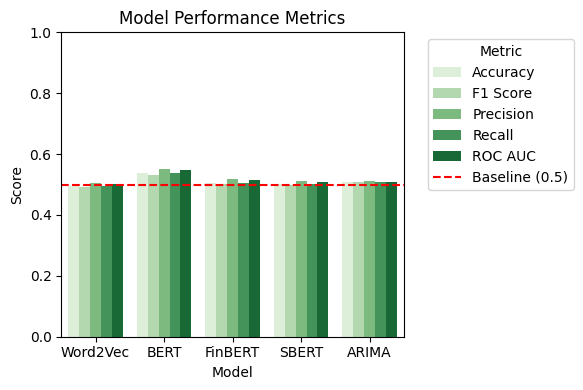

Processing ORCL
      Model  Accuracy  F1 Score  Precision    Recall   ROC AUC
0  Word2Vec  0.552752  0.550215   0.558589  0.552752  0.556067
1      BERT  0.493119  0.489469   0.497442  0.493119  0.496712
2   FinBERT  0.536697  0.534841   0.541227  0.536697  0.539511
3     SBERT  0.486239  0.480949   0.490844  0.486239  0.490483
4     ARIMA  0.607798  0.606569   0.613254  0.607798  0.610448


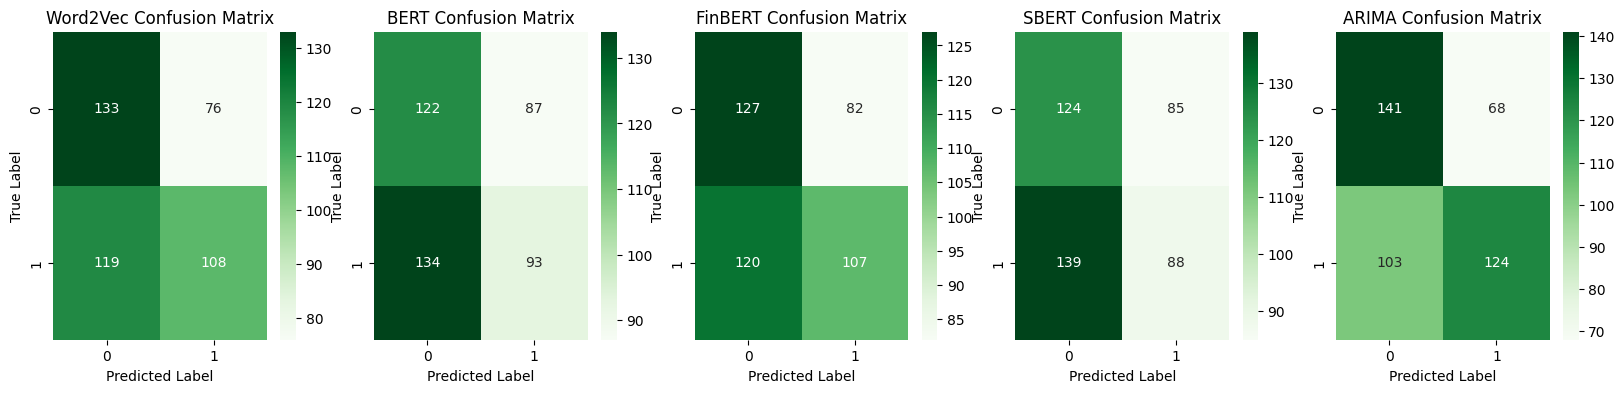

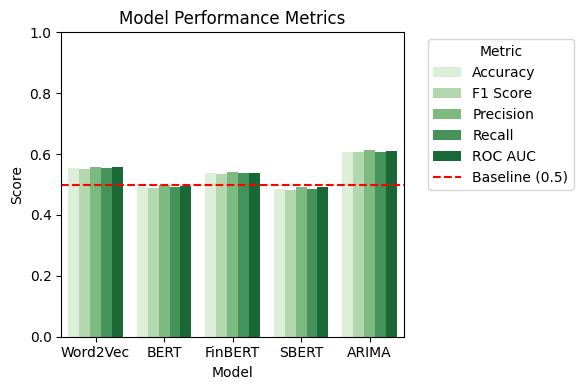

In [8]:
# time split, using arima as input
for stock in df["Stock_symbol"].unique():
    if len(df[df["Stock_symbol"] == stock]) < 2000:
        continue
        
    # extract stock
    print("Processing", stock)
    df_balanced = df[df["Stock_symbol"] == stock].copy().reset_index(drop=True)
    
    # extract vectors
    df_balanced = df_balanced.sort_values("Date").reset_index(drop=True)
    X_bert, X_finBert, X_sBert, X_word2vec, y = extract_embeddings(df_balanced)
    
    X_arima = df_balanced["arima_prediction"].values.reshape(-1, 1)

    # Concatenate ARIMA prediction to all embeddings
    X_bert = np.hstack([X_bert])
    X_finBert = np.hstack([X_finBert])
    X_sBert = np.hstack([X_sBert])
    X_word2vec = np.hstack([X_word2vec])

    # Define 80% training, 20% testing split (time-wise)
    split_idx = int(len(df_balanced) * 0.8)

    # Train-test split
    X_train_bert, X_test_bert = X_bert[:split_idx], X_bert[split_idx:]
    X_train_finBert, X_test_finBert = X_finBert[:split_idx], X_finBert[split_idx:]
    X_train_sBert, X_test_sBert = X_sBert[:split_idx], X_sBert[split_idx:]
    X_train_word2vec, X_test_word2vec = X_word2vec[:split_idx], X_word2vec[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    # Store test indices
    X_test_index = np.arange(split_idx, len(df_balanced))

    y_pred_sBert, y_pred_bert, y_pred_finBert, y_pred_word2vec = get_predictions()

    # Visualize performance
    visualize_performance(y_test, Word2Vec = y_pred_word2vec, BERT=y_pred_bert, FinBERT=y_pred_finBert, SBERT=y_pred_sBert,
                          ARIMA=df_balanced.loc[X_test_index, "arima_3d_direction"])

### Time wise 8-2 with ARIMA

Processing NFLX
      Model  Accuracy  F1 Score  Precision    Recall   ROC AUC
0  Word2Vec  0.485523  0.489325   0.506693  0.485523  0.490228
1      BERT  0.456570  0.458856   0.461770  0.456570  0.443273
2   FinBERT  0.481069  0.484160   0.488928  0.481069  0.471503
3     SBERT  0.478842  0.482256   0.487914  0.478842  0.470447
4     ARIMA  0.505568  0.508173   0.512030  0.505568  0.495580


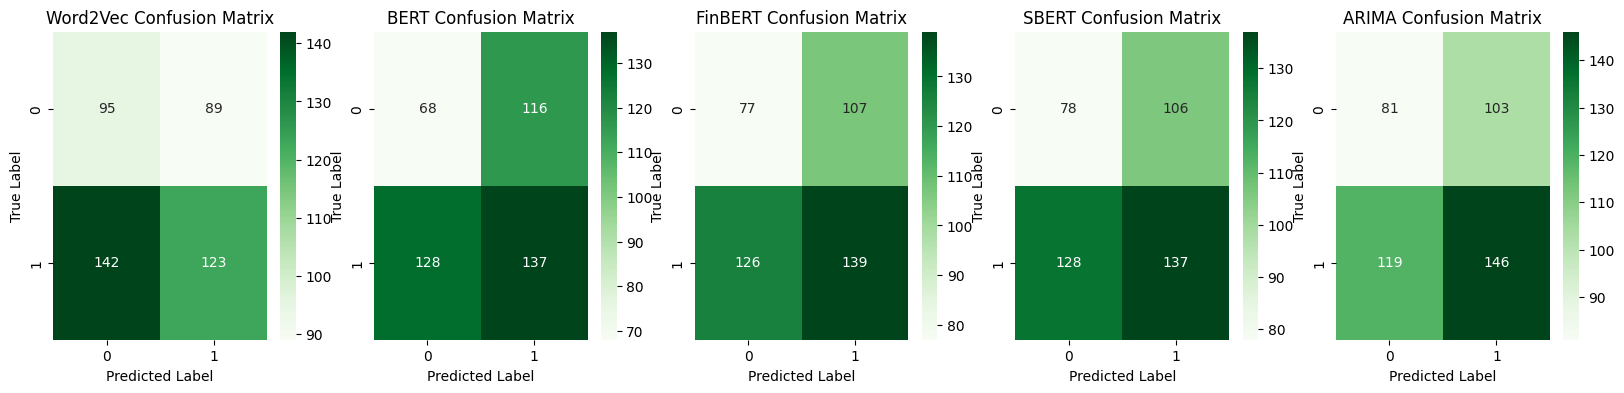

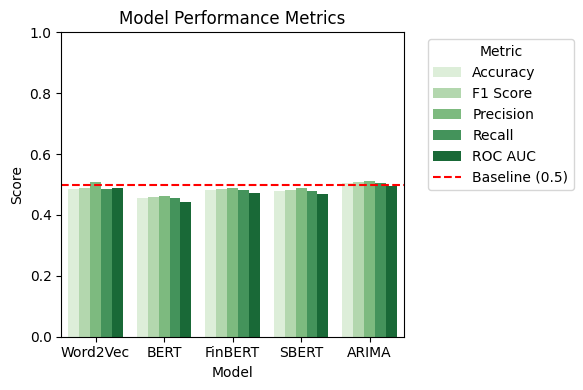

Processing NVDA
      Model  Accuracy  F1 Score  Precision    Recall   ROC AUC
0  Word2Vec  0.492958  0.493759   0.497259  0.492958  0.493829
1      BERT  0.490946  0.489634   0.499639  0.490946  0.496315
2   FinBERT  0.494970  0.493394   0.504121  0.494970  0.500701
3     SBERT  0.505030  0.505692   0.510040  0.505030  0.506652
4     ARIMA  0.509054  0.509581   0.510371  0.509054  0.507027


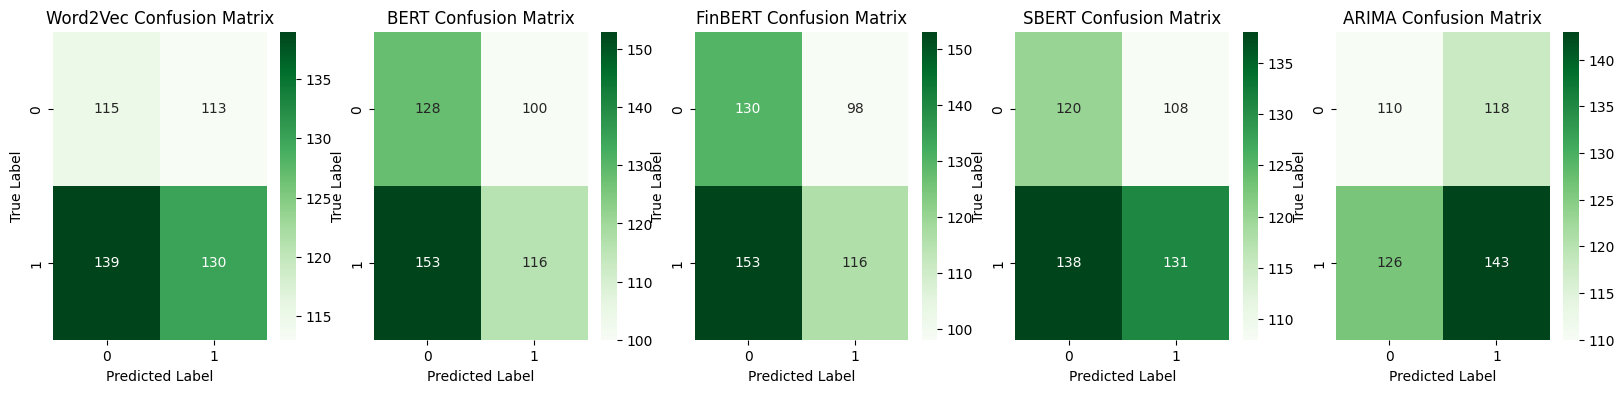

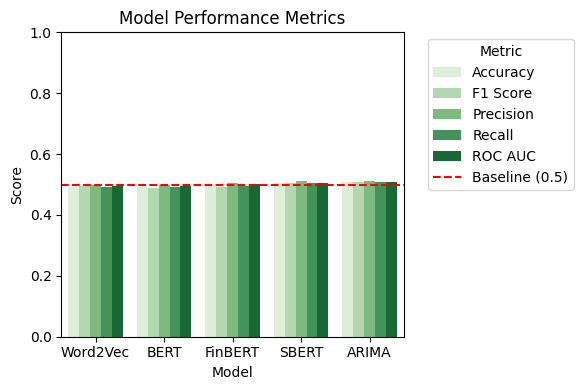

Processing ORCL
      Model  Accuracy  F1 Score  Precision    Recall   ROC AUC
0  Word2Vec  0.665138  0.664983   0.668226  0.665138  0.666653
1      BERT  0.600917  0.599555   0.606476  0.600917  0.603651
2   FinBERT  0.678899  0.678656   0.682544  0.678899  0.680627
3     SBERT  0.651376  0.650377   0.657382  0.651376  0.654006
4     ARIMA  0.607798  0.606569   0.613254  0.607798  0.610448


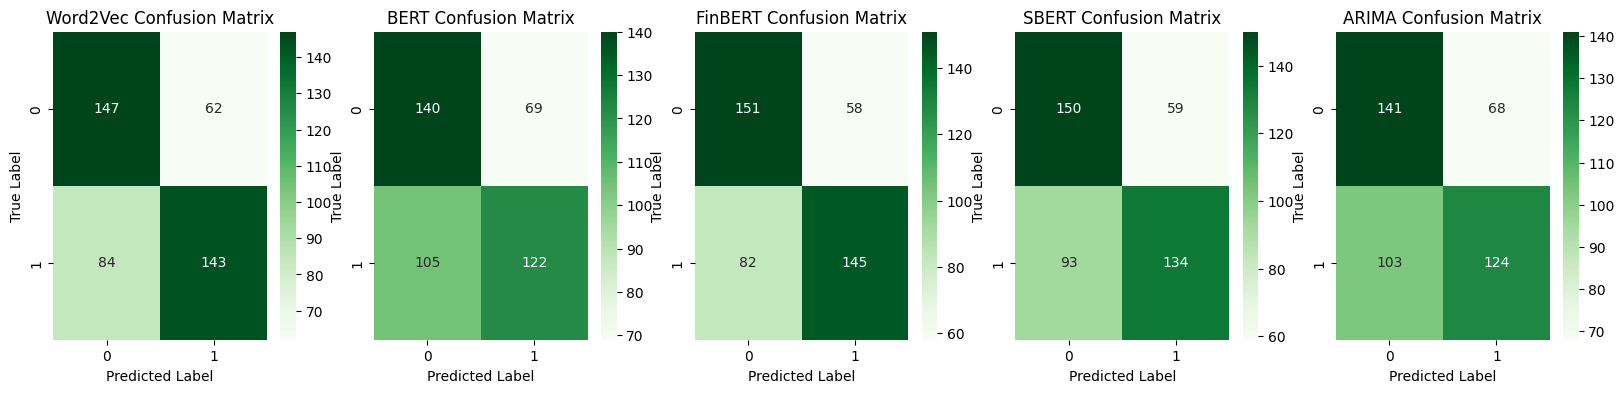

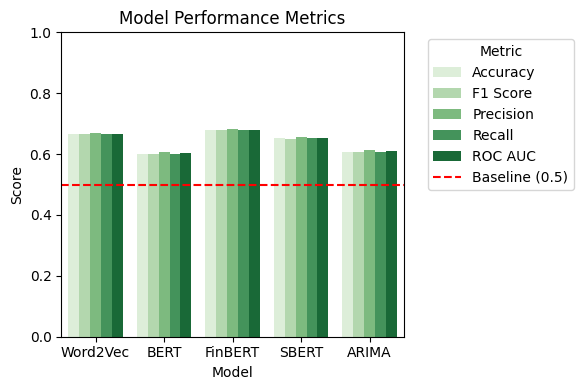

In [7]:

for stock in df["Stock_symbol"].unique():
    if len(df[df["Stock_symbol"] == stock]) < 2000:
        continue
        
    # extract stock
    print("Processing", stock)
    df_balanced = df[df["Stock_symbol"] == stock].copy().reset_index(drop=True)
    
    # extract vectors
    df_balanced = df_balanced.sort_values("Date").reset_index(drop=True)
    X_bert, X_finBert, X_sBert, X_word2vec, y = extract_embeddings(df_balanced)
    
    # Extract ARIMA predictions
    X_arima = df_balanced["arima_prediction"].values.reshape(-1, 1)

    # Concatenate ARIMA prediction to all embeddings
    X_bert = np.hstack([X_bert, X_arima])
    X_finBert = np.hstack([X_finBert, X_arima])
    X_sBert = np.hstack([X_sBert, X_arima])
    X_word2vec = np.hstack([X_word2vec, X_arima])

    # Define 80% training, 20% testing split
    split_idx = int(len(df_balanced) * 0.8)

    # Train-test split
    X_train_bert, X_test_bert = X_bert[:split_idx], X_bert[split_idx:]
    X_train_finBert, X_test_finBert = X_finBert[:split_idx], X_finBert[split_idx:]
    X_train_sBert, X_test_sBert = X_sBert[:split_idx], X_sBert[split_idx:]
    X_train_word2vec, X_test_word2vec = X_word2vec[:split_idx], X_word2vec[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    # Store test indices
    X_test_index = np.arange(split_idx, len(df_balanced))

    y_pred_sBert, y_pred_bert, y_pred_finBert, y_pred_word2vec = get_predictions()

    # Visualize performance
    visualize_performance(y_test, Word2Vec = y_pred_word2vec, BERT=y_pred_bert, FinBERT=y_pred_finBert, SBERT=y_pred_sBert,
                          ARIMA=df_balanced.loc[X_test_index, "arima_3d_direction"])

### Not stock specific, 8-2 timewise with ARIMA.

      Model  Accuracy  F1 Score  Precision    Recall   ROC AUC
0      BERT  0.591330  0.590505   0.590153  0.591330  0.587101
1   FinBERT  0.583259  0.583176   0.583100  0.583259  0.580394
2     SBERT  0.572496  0.571969   0.571639  0.572496  0.568698
3  Word2Vec  0.576682  0.576936   0.577271  0.576682  0.574640
4     ARIMA  0.590433  0.591005   0.592355  0.590433  0.589873


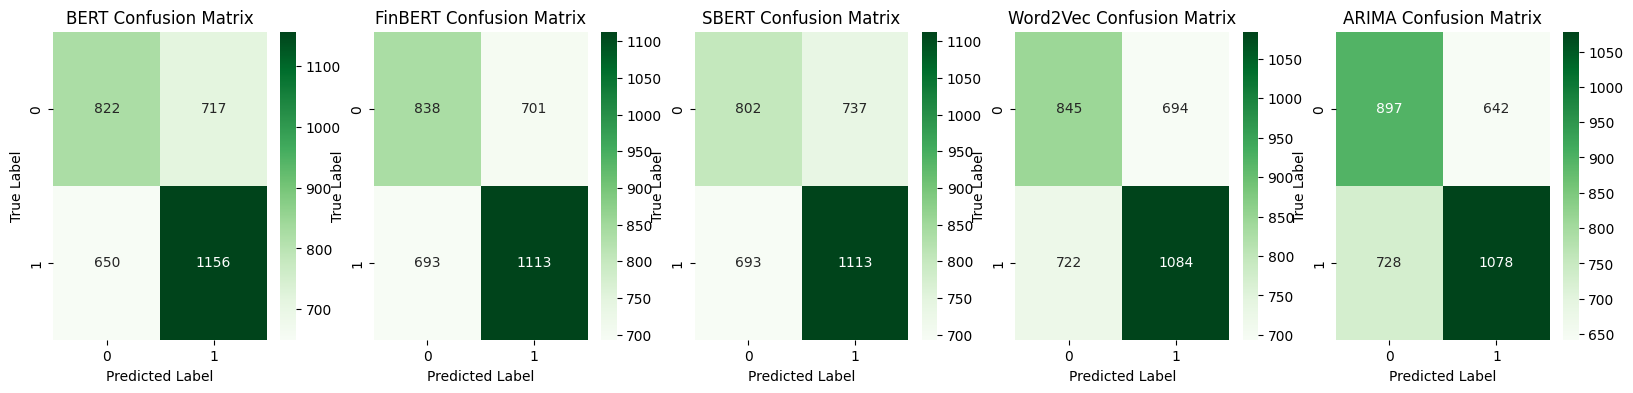

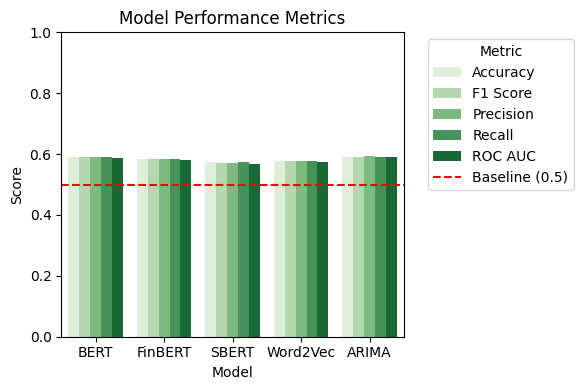

In [22]:
# extract vectors
df_balanced = df.sort_values("Date").reset_index(drop=True)
X_bert, X_finBert, X_sBert, X_word2vec, y = extract_embeddings(df_balanced)

# Extract ARIMA predictions
X_arima = df_balanced["arima_prediction"].values.reshape(-1, 1)

# Concatenate ARIMA prediction to all embeddings
X_bert = np.hstack([X_bert, X_arima])
X_finBert = np.hstack([X_finBert, X_arima])
X_sBert = np.hstack([X_sBert, X_arima])
X_word2vec = np.hstack([X_word2vec, X_arima])

# Define 80% training, 20% testing split (time-wise)
split_idx = int(len(df_balanced) * 0.8)

# Train-test split (first 80% for training, last 20% for testing)
X_train_bert, X_test_bert = X_bert[:split_idx], X_bert[split_idx:]
X_train_finBert, X_test_finBert = X_finBert[:split_idx], X_finBert[split_idx:]
X_train_sBert, X_test_sBert = X_sBert[:split_idx], X_sBert[split_idx:]
X_train_word2vec, X_test_word2vec = X_word2vec[:split_idx], X_word2vec[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Store test indices
X_test_index = np.arange(split_idx, len(df_balanced))

y_pred_sBert, y_pred_bert, y_pred_finBert, y_pred_word2vec = get_predictions()

# Visualize performance
visualize_performance(y_test, BERT=y_pred_bert, FinBERT=y_pred_finBert, SBERT=y_pred_sBert, Word2Vec=y_pred_word2vec, 
                      ARIMA=df_balanced.loc[X_test_index, "arima_3d_direction"])


### Logistic Regression

      Model  Accuracy  F1 Score  Precision    Recall   ROC AUC
0      BERT  0.570105  0.567574   0.567461  0.570105  0.563650
1   FinBERT  0.562033  0.559658   0.559395  0.562033  0.555742
2     SBERT  0.586547  0.579421   0.583153  0.586547  0.576235
3  WORD2VEC  0.575187  0.563152   0.570963  0.575187  0.562064
4     ARIMA  0.590433  0.591005   0.592355  0.590433  0.589873


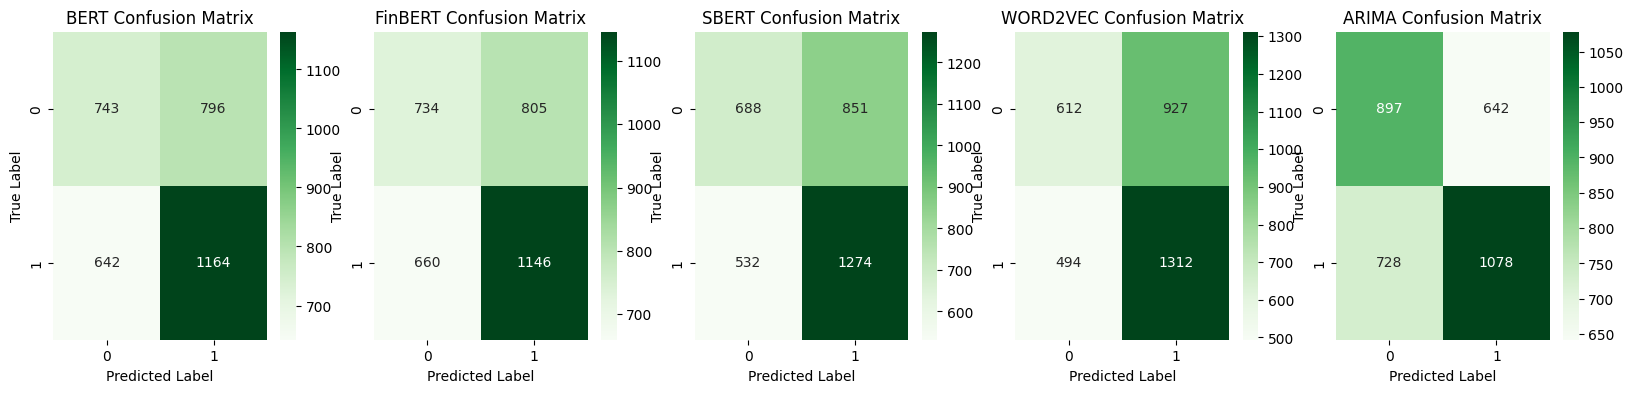

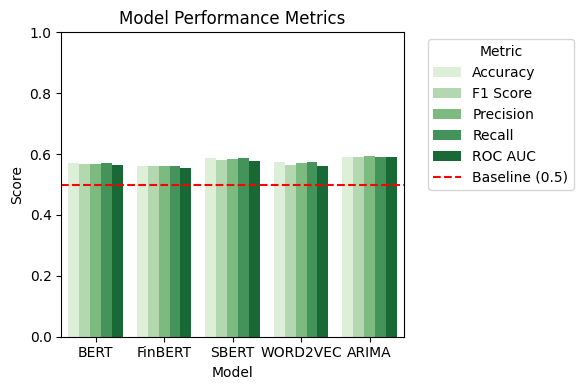

In [21]:
from sklearn.linear_model import LogisticRegression

# extract vectors
df_balanced = df.sort_values("Date").reset_index(drop=True)
X_bert, X_finBert, X_sBert, X_word2vec, y = extract_embeddings(df_balanced)

# Extract ARIMA predictions (ensure correct shape)
X_arima = df_balanced["arima_prediction"].values.reshape(-1, 1)  # Reshape to column vector

# Concatenate ARIMA prediction to all embeddings
X_bert = np.hstack([X_bert, X_arima])
X_finBert = np.hstack([X_finBert, X_arima])
X_sBert = np.hstack([X_sBert, X_arima])
X_word2vec = np.hstack([X_word2vec, X_arima])

# Define 80% training, 20% testing split (time-based)
split_idx = int(len(df_balanced) * 0.8)

# Train-test split (first 80% for training, last 20% for testing)
X_train_bert, X_test_bert = X_bert[:split_idx], X_bert[split_idx:]
X_train_finBert, X_test_finBert = X_finBert[:split_idx], X_finBert[split_idx:]
X_train_sBert, X_test_sBert = X_sBert[:split_idx], X_sBert[split_idx:]
X_train_word2vec, X_test_word2vec = X_word2vec[:split_idx], X_word2vec[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Store test indices
X_test_index = np.arange(split_idx, len(df_balanced))

# Initialize models
model_bert = LogisticRegression(max_iter=2000, random_state=42)
model_finBert = LogisticRegression(max_iter=2000, random_state=42)
model_sBert = LogisticRegression(max_iter=2000, random_state=42)
model_word2vec = LogisticRegression(max_iter=1000, random_state=42)

# Train models
model_bert.fit(X_train_bert, y_train)
model_finBert.fit(X_train_finBert, y_train)
model_sBert.fit(X_train_sBert, y_train)
model_word2vec.fit(X_train_word2vec, y_train)

# Predictions
y_pred_bert = model_bert.predict(X_test_bert)
y_pred_finBert = model_finBert.predict(X_test_finBert)
y_pred_sBert = model_sBert.predict(X_test_sBert)
y_pred_word2vec = model_word2vec.predict(X_test_word2vec)

# Evaluate performance
visualize_performance(y_test, BERT=y_pred_bert, FinBERT=y_pred_finBert, SBERT=y_pred_sBert, WORD2VEC = y_pred_word2vec, ARIMA=df_balanced.loc[X_test_index, "arima_3d_direction"])


      Model  Accuracy  F1 Score  Precision    Recall   ROC AUC
0      BERT  0.532735  0.528409   0.528905  0.532735  0.525988
1   FinBERT  0.531839  0.527649   0.528060  0.531839  0.525189
2     SBERT  0.533034  0.519878   0.526139  0.533034  0.521743
3  WORD2VEC  0.530045  0.445005   0.511213  0.530045  0.503779
4     ARIMA  0.501046  0.499889   0.499345  0.501046  0.497046


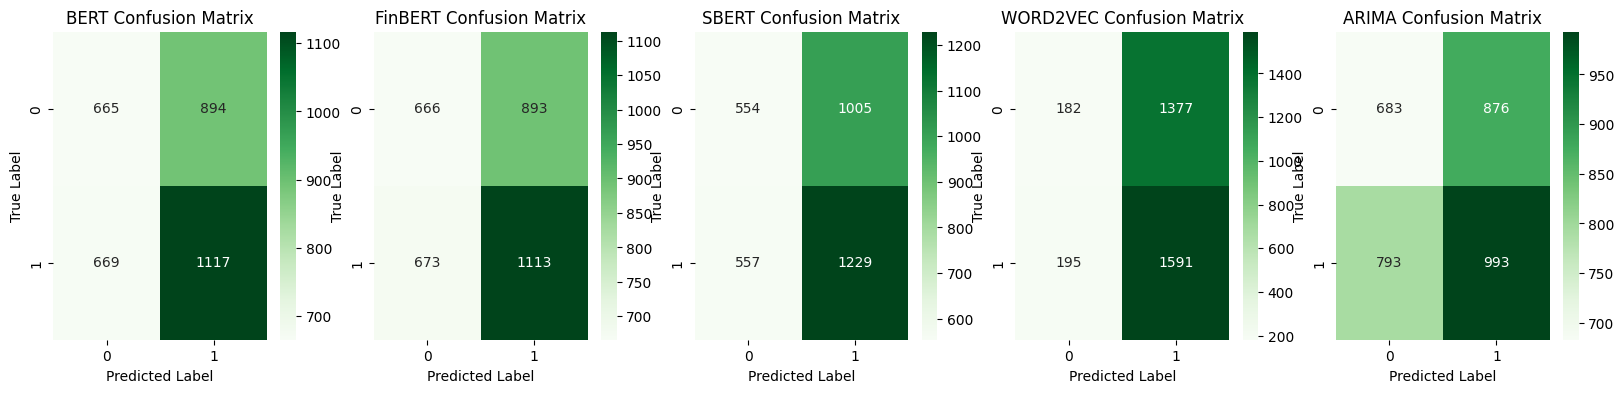

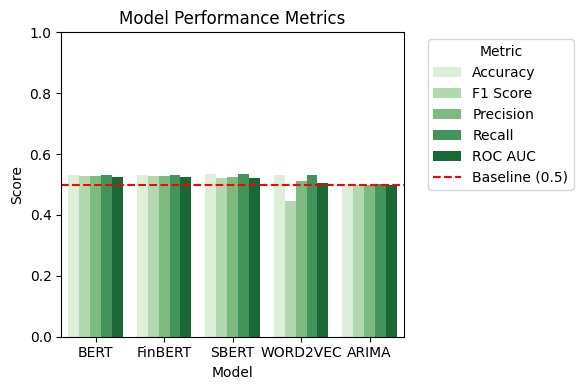

In [19]:

df_balanced = df.copy().reset_index(drop=True)

# extract vectors
X_bert, X_finBert, X_sBert, X_word2vec, y = extract_embeddings(df_balanced)

# Train test split (random 8:2 split)
X_train_bert, X_test_bert, y_train, y_test, train_idx, test_idx = train_test_split(X_bert, y, np.arange(len(y)), test_size=0.2, random_state=42, stratify=y)
X_train_finBert, X_test_finBert, _, _, _, _ = train_test_split(X_finBert, y, np.arange(len(y)), test_size=0.2, random_state=42, stratify=y)
X_train_sBert, X_test_sBert, _, _, _, _ = train_test_split(X_sBert, y, np.arange(len(y)), test_size=0.2, random_state=42, stratify=y)
X_train_word2vec, X_test_word2vec, _, _, _, _ = train_test_split(X_word2vec, y, np.arange(len(y)), test_size=0.2, random_state=42, stratify=y)
X_test_index = test_idx


# Store test indices
X_test_index = np.arange(split_idx, len(df_balanced))

# Initialize models
model_bert = LogisticRegression(max_iter=2000, random_state=42)
model_finBert = LogisticRegression(max_iter=2000, random_state=42)
model_sBert = LogisticRegression(max_iter=2000, random_state=42)
model_word2vec = LogisticRegression(max_iter=1000, random_state=42)

# Train models
model_bert.fit(X_train_bert, y_train)
model_finBert.fit(X_train_finBert, y_train)
model_sBert.fit(X_train_sBert, y_train)
model_word2vec.fit(X_train_word2vec, y_train)

# Predictions
y_pred_bert = model_bert.predict(X_test_bert)
y_pred_finBert = model_finBert.predict(X_test_finBert)
y_pred_sBert = model_sBert.predict(X_test_sBert)
y_pred_word2vec = model_word2vec.predict(X_test_word2vec)

# Evaluate performance
visualize_performance(y_test, BERT=y_pred_bert, FinBERT=y_pred_finBert, SBERT=y_pred_sBert, WORD2VEC = y_pred_word2vec, ARIMA=df_balanced.loc[X_test_index, "arima_3d_direction"])
